# Product sales Analysis


In this , We begin and  building our project by loading and preprocessing the dataset. 

Start building the product sales analysis using IBM Cognos for visualization. 

Defininig the analysis objectives and collect sales data from source shared. 

Process and clean the collected data to ensure its accuracy and reliability.

# step 1: Importing Necessary Libraries

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Step 2: Loading the Datasets 

In [7]:
#Loading the given dataset to Analyze the data 
data = pd.read_csv("C:\Dataset\statsfinal.csv")

In [8]:
# Checking the first 5 and last 5 rows of the dataset
data.head(-1)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4594,4594,29-01-2023,1227,3044,5510,1896,3889.59,19298.96,29864.20,13518.48
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62


In [4]:
#removing the first column
data = data.drop(columns=['Unnamed: 0']) 

# Step 3: Checking the  training data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4600 non-null   object 
 1   Q-P1    4600 non-null   int64  
 2   Q-P2    4600 non-null   int64  
 3   Q-P3    4600 non-null   int64  
 4   Q-P4    4600 non-null   int64  
 5   S-P1    4600 non-null   float64
 6   S-P2    4600 non-null   float64
 7   S-P3    4600 non-null   float64
 8   S-P4    4600 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 323.6+ KB


# Step 4 : Checking out Missing values
 From the given Data set we are going to check the missing datas in the given dataset so that we can analyse and identify the missing values and produce accurate result.

In [6]:
data.isnull().sum()

Date    0
Q-P1    0
Q-P2    0
Q-P3    0
Q-P4    0
S-P1    0
S-P2    0
S-P3    0
S-P4    0
dtype: int64

Here The data contains date.
for each date the total unit of sales for P1, P2, P3 & P4.
Also the total revenue from sales for P1, P2, P3 & P4.
We can observe the first entry in the data, starts at 13-06-2010. This means the data for year 2010 is not complete.
We can observe the last entry in the data, ends at 02-02-2023. This means the data for year 2023 is also not complete.
It will be best to drop year 2010 and year 2023.

No missing values in a dataset is not common.
while working with fresh data, you will have to do a ton of cleaning, this will result in some missing or lost data.

# Step 5:Exploratory Data Analysis
The EDA approach is precisely that--an approach--not a set of techniques, about how a data analysis should be carried out.
EDA encompasses a larger venue

EDA is an approach to data analysis that postpones the usual assumptions about what kind of model the data follow with the more direct approach of allowing the data itself to reveal its underlying structure and model. 

EDA is not a mere collection of techniques; EDA is a philosophy as to how we dissect a data set; what we look for; how we look; and how we interpret. 

It is true that EDA heavily uses the collection of techniques that we call "statistical graphics", but it is not identical to statistical graphics 

In [9]:
# Extract year from the 'Day' 'Month' 'year' from the 'Date' column using a lambda function
# We need to get the year from the data to analyse sales year to year
data['Day'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[2])
data

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [10]:
#drop rows for years 2010 and year 2023
data_reduced = data.query("Year != '2010' and Year != '2023'")

Now we Graph our TOTAL & MEAN unit sold for each product using a histogram to perform EDA.

In [11]:
#Create a function that allows us to plot a bar chart for the 4 products
def plot_bar_chart(df, columns, stri, str1, val):
    # Aggregate sales for each product by year, by sum or mean
    if val == 'sum':
        sales_by_year = df.groupby('Year')[columns].sum().reset_index()
    elif val == 'mean':
        sales_by_year = df.groupby('Year')[columns].mean().reset_index()

    # Melt the data to make it easier to plot
    sales_by_year_melted = pd.melt(sales_by_year, id_vars='Year', value_vars=columns, var_name='Product', value_name='Sales')
    # Create a bar chart
    plt.figure(figsize=(20,4))
    sns.barplot(data=sales_by_year_melted, x='Year', y='Sales', hue='Product') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(stri)
    plt.title(f'{stri} by {str1}')
    plt.xticks(rotation=45)
    plt.show()

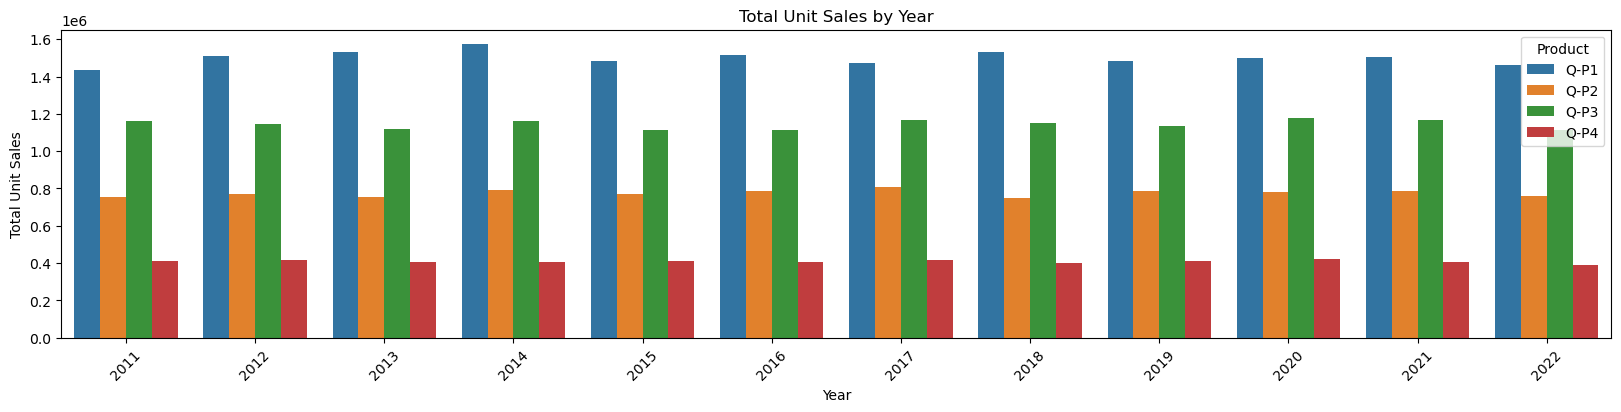

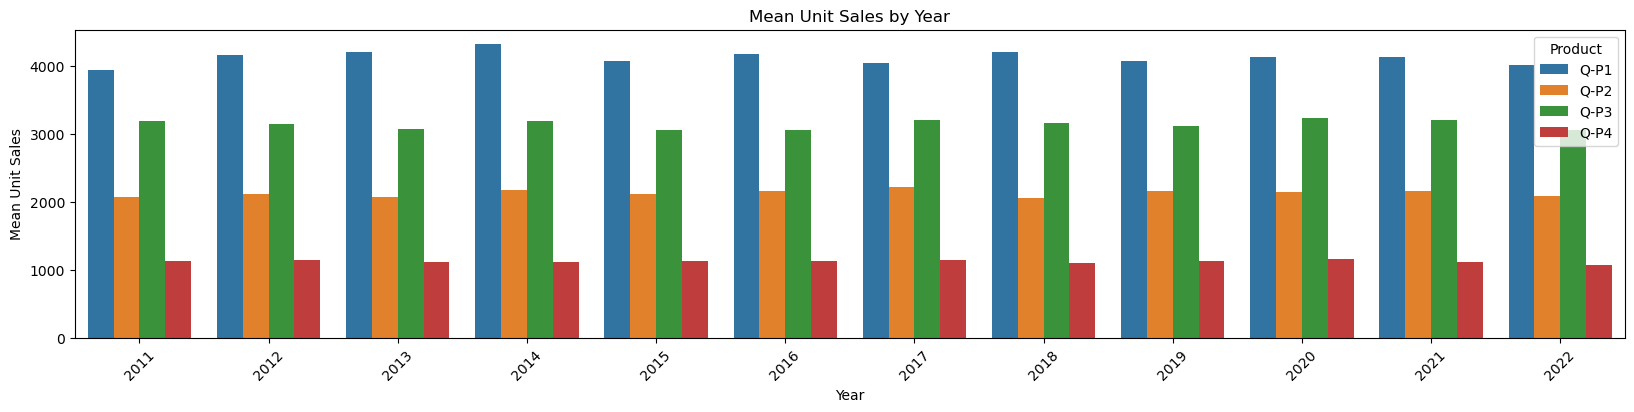

In [12]:
#using the plot_bar_chart function,we enter the Unit Sales Columns and the Unit Sales string
plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Total Unit Sales', 'Year', 'sum')

plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Mean Unit Sales', 'Year', 'mean')

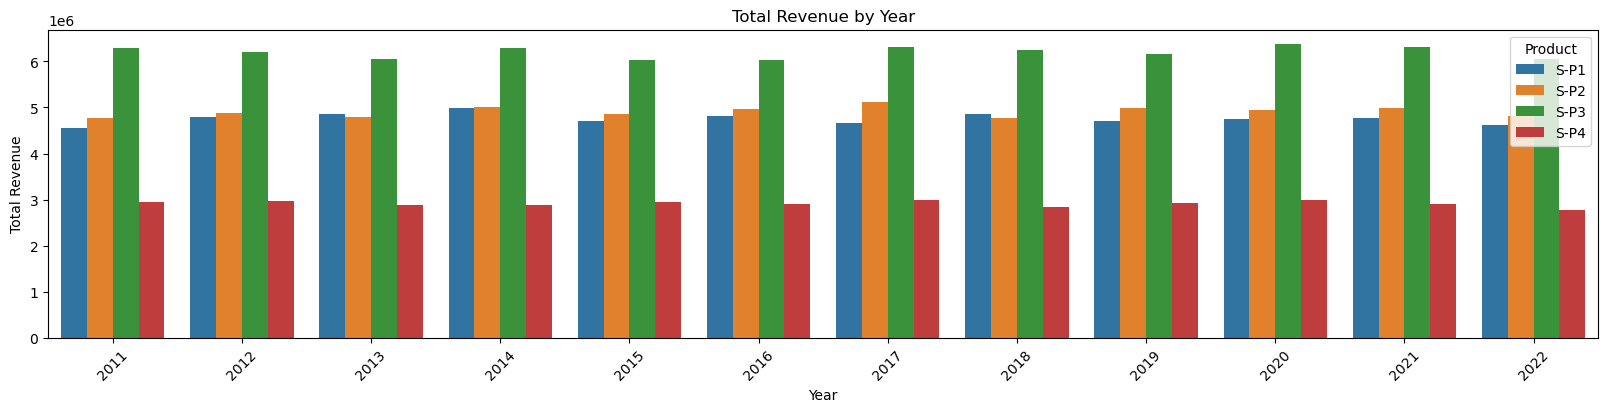

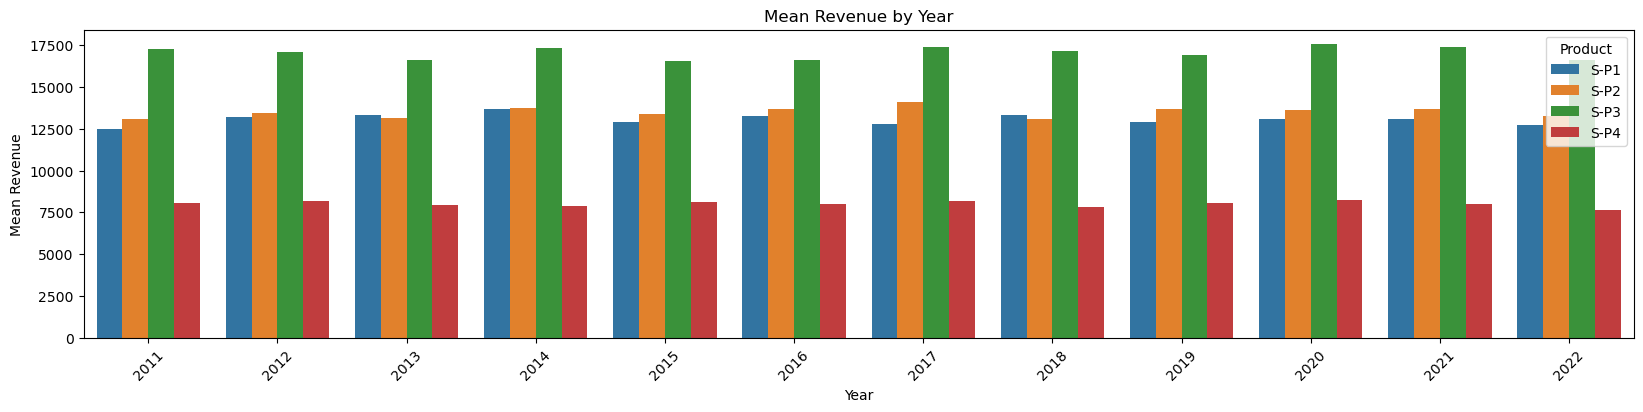

In [13]:
#use the plot_bar_chart function, enter the Revenue Columns and the Revenue string
plot_bar_chart(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Total Revenue', 'Year', 'sum')

plot_bar_chart(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Mean Revenue', 'Year', 'mean')

We can observe that P3 brought in the most revenue. 
This could be as a result of multiple things:
      P3 was sold for higher than the rest, as it had the second highest unit sales for each year.
We can observe than P1 AND P2 brought in similar revenues for each year. With P2 bringing in slightly more.
      P1 despite having the most unit sold, brought in the second lowest revenue each year.

In [14]:
data

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


Trend in sales of all four products during certain months

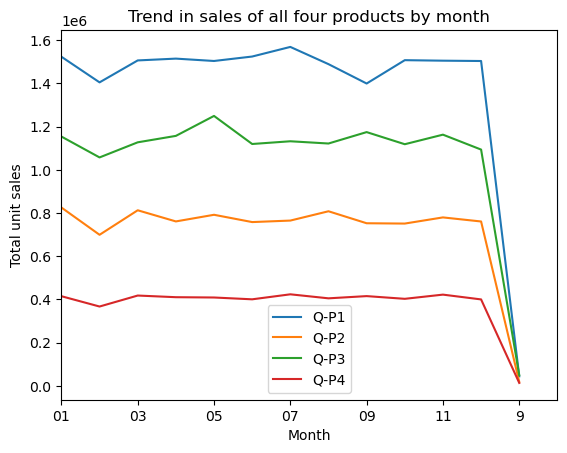

In [16]:
# Create a figure and axis
def month_plot():
    fig, ax = plt.subplots()

    # Plot the sales data for each product by month
    data_reduced.groupby('Month')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum().plot(ax=ax)

    # Set the x-axis limits to only show up to December
    ax.set_xlim(left=0, right=13)

    # Set the axis labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Total unit sales')
    ax.set_title('Trend in sales of all four products by month')

    # Show the plot
    plt.show()
month_plot()

1.We can observe that all products drop in Feb.


2.There also appears a very drastic drop after 12th month. 
The value show 9, which must be part of month 09. We need to rename this column to match with the 09. Before doing further analysis.

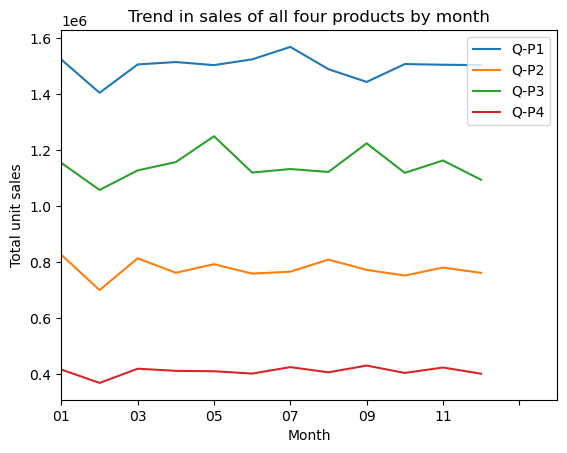

In [17]:
# Replace all entries of '9' in the Month column with '09'
data_reduced['Month'] = data['Month'].replace('9', '09')
month_plot()

from the above trend sales histogram We can observe that Feb and Dec have the lowest sales for each product
For P1 We can observe Mar - Jul having the highest unit sales
For P2 We can observe Jan, Mar - Aug having the highest unit sales
For P3 We can observe May & Sep having the highest unit sales
For P4 We can observe uniform sales from Jan - Dec

In [19]:
#to analyse data in an specific handling 
#get the 31st day for each month in each year.
def month_31_data(df, months):
    m31_data = df[df['Month'].isin(months) & (df['Day'] == '31')]
    return m31_data

_31_months = month_31_data(data_reduced, ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
_31_months

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
231,231,31-01-2011,939,3325,1863,1612,2976.63,21080.50,10097.46,11493.56,31,01,2011
290,290,31-03-2011,464,2220,421,1663,1470.88,14074.80,2281.82,11857.19,31,03,2011
351,351,31-05-2011,1507,2980,3816,1202,4777.19,18893.20,20682.72,8570.26,31,05,2011
412,412,31-07-2011,4336,744,4717,667,13745.12,4716.96,25566.14,4755.71,31,07,2011
442,442,31-08-2011,4548,1484,1596,1974,14417.16,9408.56,8650.32,14074.62,31,08,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,4352,31-05-2022,3669,2710,3067,1593,11630.73,17181.40,16623.14,11358.09,31,05,2022
4413,4413,31-07-2022,1437,833,1867,1270,4555.29,5281.22,10119.14,9055.10,31,07,2022
4443,4443,31-08-2022,1035,1639,3658,841,3280.95,10391.26,19826.36,5996.33,31,08,2022
4474,4474,31-9-2022,6964,1873,5481,1336,22075.88,11874.82,29707.02,9525.68,31,09,2022


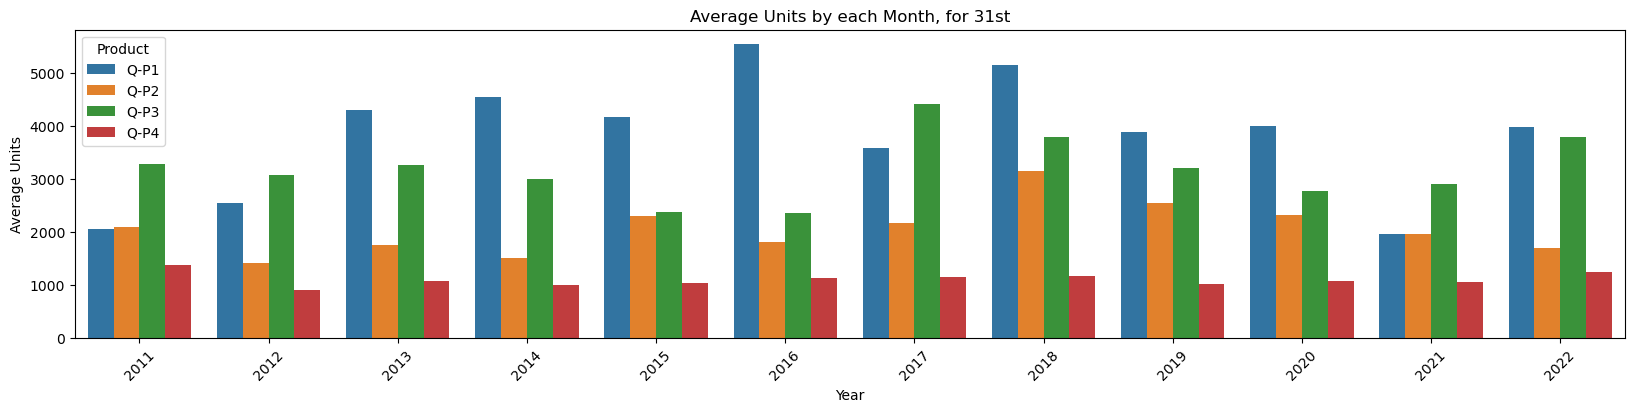

In [20]:
#from the above the data we produce  the mean value and the plot the barchart
plot_bar_chart(_31_months, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'], 'Average Units', 'each Month, for 31st', 'mean')

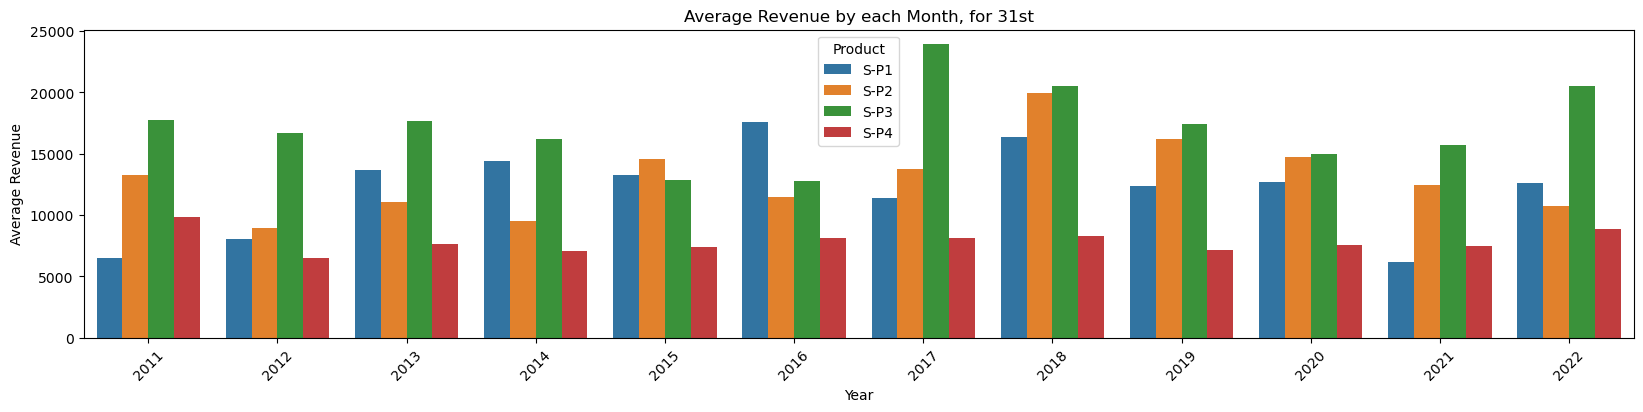

In [21]:
plot_bar_chart(_31_months, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Average Revenue', 'each Month, for 31st', 'mean')

we can see that P1 has the highest unit sales on the 31st for each year, except for 2021 and 2022. (These could be as a result to Covid and other economy issues).

P3 has the second highest unit sales for all the 31st in each year.

In [22]:
# gives us the average for all the 31st days across all years for each product
def avg_on_31st(df, product):
    df_31 = df[df['Day'] == '31']
    avg_sales = df_31[product].mean()
    return avg_sales
# Average for Unit Sales
avg_on_31st(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']).round(2)

Q-P1    3813.74
Q-P2    2058.80
Q-P3    3183.88
Q-P4    1098.61
dtype: float64

In [23]:
# Average for Revenue
avg_on_31st(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4']).round(2)

S-P1    12089.55
S-P2    13052.78
S-P3    17256.63
S-P4     7833.07
dtype: float64

By Performing the analysis 

We can see that our previous observation correlate as Q-P1 has the higest estimate, follwed by Q-P3

We can approxiamte that the company will make:

Q-P1: 3813.74
Q-P2: 2058.80
Q-P3: 3183.88
Q-P4: 1098.61

Conclusion:



In this analysis, we embarked on a project to analyze product sales data. 

The steps involved included data loading, data cleaning, exploratory data analysis (EDA), and visualizations.

Below is a summary of the key findings and conclusions:

1. Importing Necessary Libraries:
    We imported essential libraries such as pandas, numpy, matplotlib, and seaborn for data manipulation and visualization.

2. Loading the Dataset:
    The dataset was loaded from a source file ("statsfinal.csv") for analysis.

3. Data Cleaning:
    We performed data cleaning by removing an unnecessary first column and checked for any missing values in the dataset.

4. Exploratory Data Analysis (EDA):
    EDA was conducted to understand the dataset and derive meaningful insights from it. Key steps in the EDA process included:

   a. Extracting Date Components:
    We extracted the day, month, and year from the 'Date' column to enable yeartoyear sales analysis.

   b. Filtering Data for Complete Years:
    Data for the years 2010 and 2023, which were incomplete, was excluded from the analysis.

   c. Total & Mean Unit Sales Analysis:
    Visualizations were created to analyze both the total and mean unit sales for four products (P1, P2, P3, and P4) over the years. These visualizations provided insights into product sales trends.

   d. Total & Mean Revenue Analysis:
    Similar to unit sales, we analyzed the total and mean revenue generated by each product. P3 consistently generated the highest revenue.

   e. Monthly Sales Trends:
    We examined the sales trends for each product by month. It was observed that February and December had the lowest sales, while specific months had the highest sales for each product.

   f. Sales on the 31st Day of Each Month:
    Unit sales and revenue on the 31st day of each month were analyzed. P1 consistently had the highest unit sales on the 31st day, except for 2021 and 2022, which may have been influenced by external factors.

5. Conclusion:
    The analysis yielded several insights, such as P3 consistently generating the highest revenue, and P1 having the highest unit sales on the 31st day of each month. However, it is important to note that these observations are based on historical data and do not account for external factors.
   
6. Estimating Future Sales:
    An attempt was made to estimate future sales, particularly for December 31st, by calculating the average sales on the 31st day for each product. The estimated values were provided as follows:

    QP1: 3813.74 units
    QP2: 2058.80 units
    QP3: 3183.88 units
    QP4: 1098.61 units

These estimates should be interpreted cautiously, as they are based on historical data and may not account for changing market conditions and other variables that could affect sales.

The analysis provides a foundation for making informed business decisions and further exploration into factors that may influence sales trends. 
